In [1]:

import cv2
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad
import time
import threading
#from Data_File import Data
import Data_File
from autograd.misc.optimizers import rmsprop
plt.close('all')

In [2]:
train_x,train_y = Data_File.Data('faces')
test_x,test_y = Data_File.Data('test')

(h,w) = train_y[0].shape




In [3]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def mse(img1,img2):
    return np.mean(np.square(img1 - img2))

def cost(A,B,X,y):
    total_error = 0
    ans = np.random.random((len(X),1))
    index=0
    arr = []
    for i in range(len(X)):
        
        pred = np.matmul(np.matmul(A,X[i]),B)
        total_error = total_error + mse(pred,y[i])
        index+=1
        arr.append(mse(pred,y[i]))
        total_error+=mse(pred ,y)
        
    return sum(arr)/len(arr)


def pred(img):
    x1 = np.matmul(A,img)
    x2 = np.matmul(x1,B)
    return x2


def cost2(A,B,X,y):
    
    total_error = 0
    ans = []
    for i in range(len(X)):
        ans.append(0)
        
    index=0
    objs=[]
    for i in range(len(X)):
        thd_obj = threading.Thread(target=pred_and_cost, args=(A,B,X[i],y[i],ans,index,))
        thd_obj.start()
        objs.append(thd_obj)
        
        index+=1
        
        
    for i in objs:
        i.join()
            
    return (np.sum(np.array(ans))/len(ans))


def pred_and_cost(A,B,img,y,results,index):
    
    x1 = np.matmul(A,img)
    x2 = np.matmul(x1,B)
    val = mse(x2,y)
    lst = []
    lst.append(val)
    temp = np.random.random((1,1))
   
    results[index] = val
    
    #print ("Image "+str(index) + ' is done')
    
    
    
def callback(weights,iterations,gradient):
    if i%100==0:
        print (weights.shape,gradient.shape)
    
    

In [4]:
train_x[0]

array([[ 0.03529412,  0.01568627,  0.01176471, ...,  0.42745098,
         0.42745098,  0.41176471],
       [ 0.05098039,  0.01960784,  0.01176471, ...,  0.43529412,
         0.41568627,  0.41176471],
       [ 0.04705882,  0.01960784,  0.01568627, ...,  0.15686275,
         0.03921569,  0.11764706],
       ..., 
       [ 0.42745098,  0.40392157,  0.2627451 , ...,  0.55294118,
         0.4745098 ,  0.4745098 ],
       [ 0.49411765,  0.03529412,  0.21568627, ...,  0.4       ,
         0.40784314,  0.40392157],
       [ 0.10588235,  0.03529412,  0.2       , ...,  0.39607843,
         0.40392157,  0.4       ]])

In [9]:


A = np.random.random((h,h//2))/10
B = np.random.random((w//2,w))/10




In [12]:


lr =alpha =  .01

iterations = 30000
error = []
x_axis = []



In [13]:
trainer = grad(cost2,argnum=[0,1])
start = time.time()


    

for i in range(0,iterations):
    
    
    if i%100==0:
        curr_error = cost2(A,B,train_x,train_y)
        print ("Cost at "+str(i)+" : " + str(curr_error) + " PSNR is ",psnr(pred(train_x[0])*255,train_y[0]*255)," LR : "+str(alpha)+" Time Elaspsed is ",time.time() - start)
    if i%10==0:
        x_axis.append(i+1)
        error.append(curr_error)
        
    grad_A,grad_B = trainer(A,B,train_x,train_y)
    
    A -=alpha*grad_A
    B -=alpha*grad_B
    
    alpha = lr/(((grad_A**2).sum() + (grad_B**2).sum() + 1e-8)**(.5))
    

        


('Cost at 0 : 0.0572758805321 PSNR is ', 14.043339787789396, ' LR : 0.01 Time Elaspsed is ', 0.10476303100585938)
('Cost at 100 : 0.0481562819688 PSNR is ', 14.663303040948708, ' LR : 2.2384867415 Time Elaspsed is ', 21.398694038391113)
('Cost at 200 : 0.0439249894478 PSNR is ', 15.039295303204764, ' LR : 2.4228701167 Time Elaspsed is ', 41.48520302772522)
('Cost at 300 : 0.0397791470437 PSNR is ', 15.242475512913838, ' LR : 2.38748473252 Time Elaspsed is ', 67.35852003097534)
('Cost at 400 : 0.0355624477494 PSNR is ', 15.434391326795257, ' LR : 2.36392606549 Time Elaspsed is ', 87.19233894348145)
('Cost at 500 : 0.0313514996471 PSNR is ', 15.809410493614962, ' LR : 2.38754835971 Time Elaspsed is ', 102.94326305389404)
('Cost at 600 : 0.0272201629309 PSNR is ', 16.469740515480357, ' LR : 2.46197877442 Time Elaspsed is ', 119.15493083000183)
('Cost at 700 : 0.0233099662871 PSNR is ', 17.331867514568298, ' LR : 2.67674297928 Time Elaspsed is ', 138.97544503211975)
('Cost at 800 : 0.01983

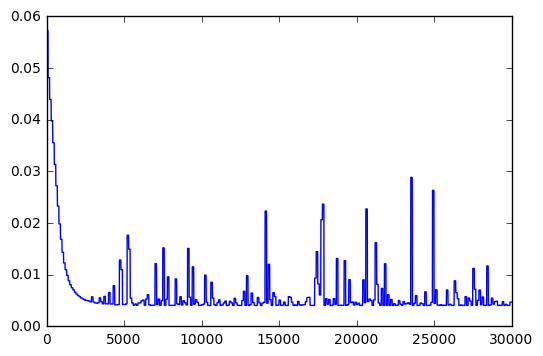

In [14]:
fig = plt.figure()
A_copy = np.copy(A)
B_copy = np.copy(B)

plt.plot(x_axis,error)
plt.show()

# Checking its Perfomance on Train Data

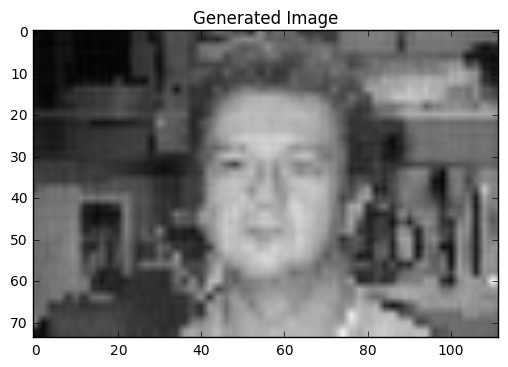

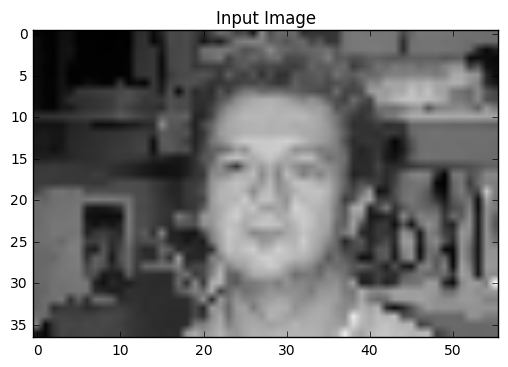

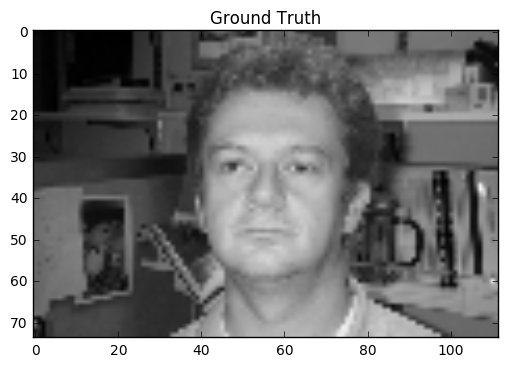

24.168643780905516

In [22]:
plt.close('all')
img_id = 0
gen_img = pred(train_x[img_id])
fig = plt.figure()
plt.imshow(gen_img,cmap='gray')
plt.title('Generated Image')

fig = plt.figure()
plt.imshow(train_x[img_id],cmap = 'gray')
plt.title('Input Image')

fig = plt.figure()
plt.imshow(train_y[img_id],cmap = 'gray')
plt.title('Ground Truth')




plt.show()

psnr(train_y[img_id]*255,gen_img*255)

# Checking its Perfomance on Test Data

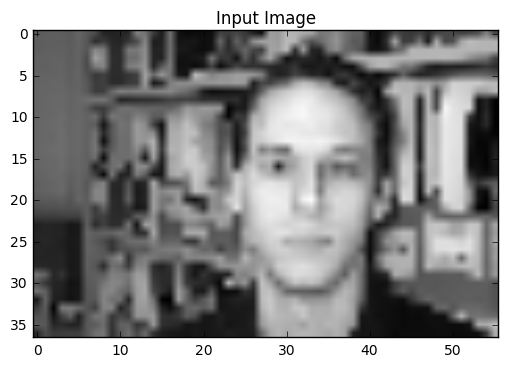

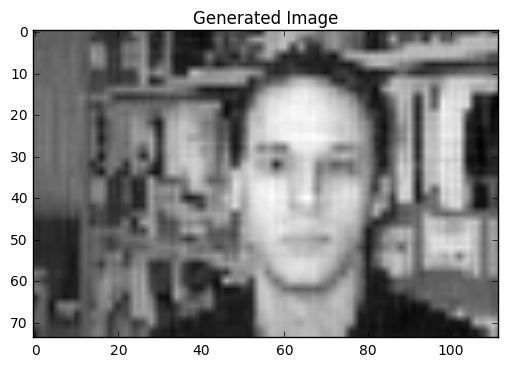

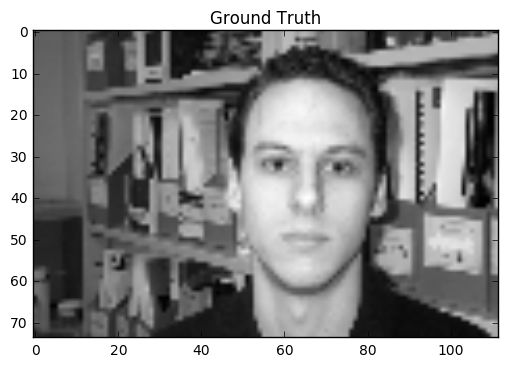

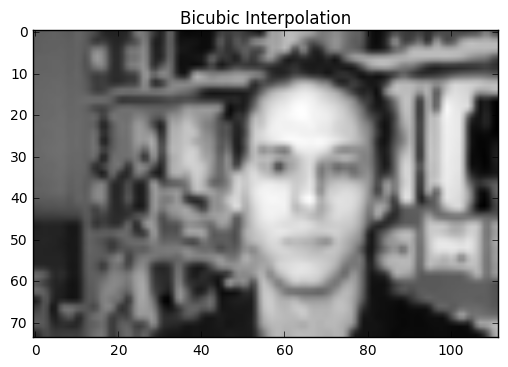

('The PSNR value of the Generated Image is ', 20.95665044064189)


In [24]:
plt.close('all')
img_id = 0
gen_img = pred(test_x[img_id])
fig = plt.figure()
plt.imshow(test_x[img_id],cmap = 'gray')
plt.title('Input Image')

fig = plt.figure()

plt.imshow(gen_img,cmap='gray')
plt.title('Generated Image')


fig = plt.figure()
plt.imshow(test_y[img_id],cmap = 'gray')
plt.title('Ground Truth')

fig = plt.figure()
plt.imshow(cv2.resize(test_x[img_id],(0,0),fx=2,fy=2),cmap='gray')
plt.title("Bicubic Interpolation")
plt.show()

print ("The PSNR value of the Generated Image is ",psnr(test_y[img_id]*255,gen_img*255))


In [70]:
test_x.shape
    

(46, 37, 56)

In [9]:
a = time.time()
cost(A,B,train_x,train_y)
print (time.time()-a)

NameError: name 'A' is not defined

In [17]:
a = time.time()
print (cost2(A,B,train_x,train_y))
print (time.time() - a)

1718.24134528
0.553771972656


In [121]:
a

array([[ 0.03913755]])

In [16]:
a = time.time()
print (cost(A,B,train_x,train_y))
print (time.time()-a)

1718.24134528
10.3094449043


In [132]:
a.shape


(1, 1)

In [134]:
a.mean().shape

()

In [174]:
a = np.random.random((100,100))

In [180]:
b=  np.random.random((10,10))
b[0,0] = a.mean()

In [178]:
b[0,0].shape

()

In [179]:
a.shape

(100, 100)

In [224]:
type(a)

numpy.ndarray

In [15]:
v = pred(train_x[0])

In [16]:
v

array([[ 0.54034151,  0.52049488,  0.49257554, ...,  0.56462224,
         0.54362898,  0.54553284],
       [ 0.54367526,  0.51963592,  0.49262726, ...,  0.56369355,
         0.54161705,  0.55145482],
       [ 0.54393011,  0.52797987,  0.48345489, ...,  0.56612611,
         0.55184064,  0.54815974],
       ..., 
       [ 0.51413402,  0.49699187,  0.46773831, ...,  0.53790241,
         0.51651831,  0.51572294],
       [ 0.53621269,  0.52177198,  0.51329258, ...,  0.57490408,
         0.54343359,  0.55355732],
       [ 0.53178238,  0.50306271,  0.46533673, ...,  0.54503158,
         0.52269251,  0.52634186]])

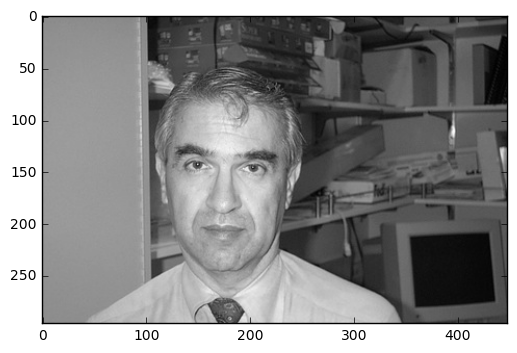

In [8]:
plt.imshow(train_y[10],cmap = 'gray')
plt.show()

In [6]:
h

296

In [7]:
w

448

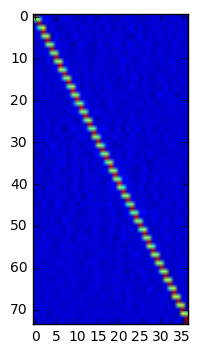

In [27]:
%matplotlib inline
plt.imshow(A)

In [ ]:
!pip install seaborn
import seaborn as sns
sns.heatmap(A)